# Pizza Place Sales Analysis
This Project analyzes one year of sales data from a fictional pizza place. The dataset includes information about orders, pizza types, sizes, prices, quantities, and timestamps. 
The goal is to explore sales performanc, customer behavior, and trends over time. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
orders = pd.read_csv("orders.csv",encoding="latin1")
order_details = pd.read_csv("order_details.csv",encoding="latin1")
pizzas = pd.read_csv("pizzas.csv",encoding="latin1")
pizza_types = pd.read_csv("pizza_types.csv",encoding="latin1")

In [4]:
orders.head()
order_details.head()
pizzas.head()
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


## Data Overview
- orders: Contains order ID, date, and time.
- order_details: Contains pizza Id and quantity for each order.
- pizzas: Contains pizza size and price.
- pizza_types: Contains pizza category, name, and ingredients.

In [4]:
df = pd.merge(order_details, pizzas, on="pizza_id")
df = pd.merge(df, pizza_types, on="pizza_type_id")
df = pd.merge(df, orders, on="order_id")

df.head

<bound method NDFrame.head of        order_details_id  order_id       pizza_id  quantity pizza_type_id size  \
0                     1         1     hawaiian_m         1      hawaiian    M   
1                     2         2  classic_dlx_m         1   classic_dlx    M   
2                     3         2  five_cheese_l         1   five_cheese    L   
3                     4         2    ital_supr_l         1     ital_supr    L   
4                     5         2     mexicana_m         1      mexicana    M   
...                 ...       ...            ...       ...           ...  ...   
48615             48616     21348  ckn_alfredo_m         1   ckn_alfredo    M   
48616             48617     21348  four_cheese_l         1   four_cheese    L   
48617             48618     21348   napolitana_s         1    napolitana    S   
48618             48619     21349     mexicana_l         1      mexicana    L   
48619             48620     21350      bbq_ckn_s         1       bbq_ckn    S  

In [5]:
df["total_price"] = df["quantity"]*df["price"]

In [7]:
total_revenue = df["total_price"].sum()
total_revenue

np.float64(817860.0499999999)

## Total Revenue
The total revenue generated during the year is $817,860.05
This represents the overall performance of the business for the year.

In [8]:
total_quantity = df["quantity"].sum()
total_quantity

np.int64(49574)

In [9]:
total_orders = df["order_id"].nunique()
total_orders

21350

The store processed 21350 unique orders during the year.

In [10]:
num_pizza_types = df["name"].nunique()
num_pizza_types

32

In [11]:
average_price = df["price"].mean()
average_price

np.float64(16.494132044426163)

C:\Users\HP\AppData\Local\Temp\ipykernel_11068\1431859568.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["hour"] = pd.to_datetime(df["time"]).dt.hour


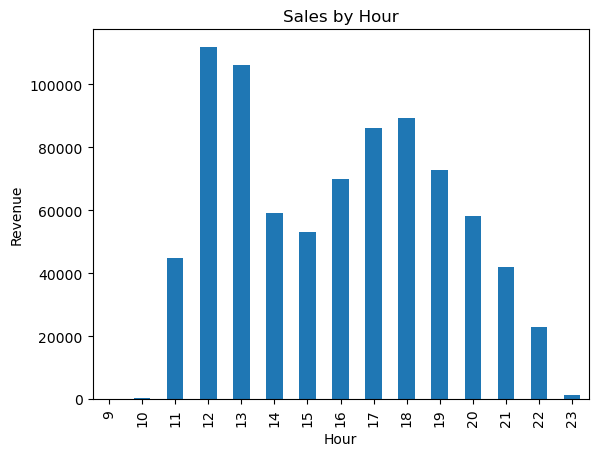

In [16]:
df["hour"] = pd.to_datetime(df["time"]).dt.hour

hourly_sales = df.groupby("hour")["total_price"].sum()

hourly_sales.plot(kind="bar")
plt.title("Sales by Hour")
plt.xlabel("Hour")
plt.ylabel("Revenue")
plt.show()

## Peak Hours
The highest sales occur around 12 hours. This suggests peak customer traffic during lunch/dinner periods.

In [18]:
df["date"] = pd.to_datetime(df["date"])
df["day_of_week"] = df["date"].dt.day_name()

daily_sales = df.groupby("day_of_week")["total_price"].sum().sort_values(ascending=False)
daily_sales

day_of_week
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
Name: total_price, dtype: float64

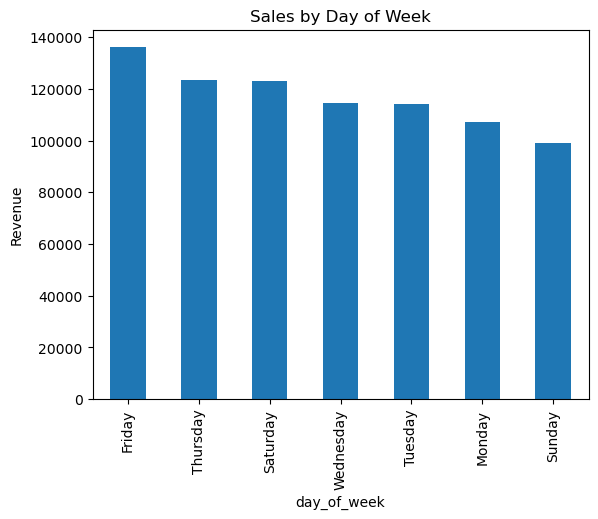

In [19]:
daily_sales.plot(kind="bar")
plt.title("Sales by Day of Week")
plt.ylabel("Revenue")
plt.show()

The highest sales occur on Friday. This may relect weekend traffic or social dining patterns. 

In [21]:
top5 = df.groupby("name")["quantity"].sum().sort_values(ascending=False).head(5)
top5

name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64

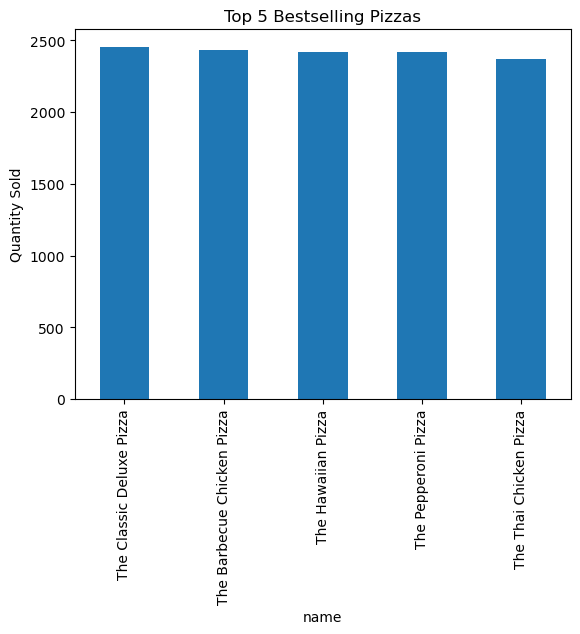

In [22]:
top5.plot(kind="bar")
plt.title("Top 5 Bestselling Pizzas")
plt.ylabel("Quantity Sold")
plt.show()

In [23]:
df["month"] = df["date"].dt.month_name()
monthly_sales = df.groupby("month")["total_price"].sum()
monthly_sales

month
April        68736.80
August       68278.25
December     64701.15
February     65159.60
January      69793.30
July         72557.90
June         68230.20
March        70397.10
May          71402.75
November     70395.35
October      64027.60
September    64180.05
Name: total_price, dtype: float64

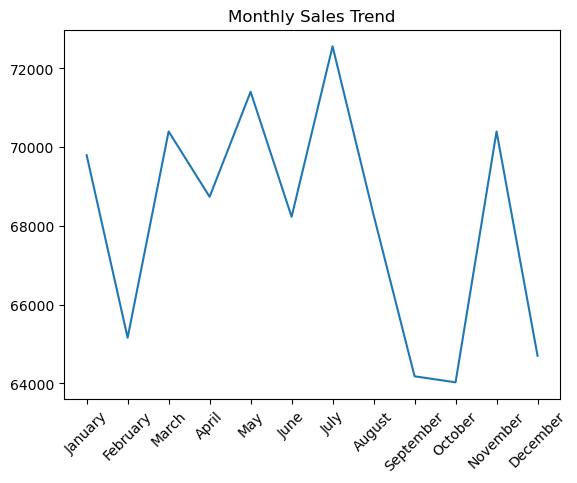

In [24]:
df["month_num"] = df["date"].dt.month
monthly_sales = df.groupby(["month_num","month"])["total_price"].sum().reset_index()
monthly_sales = monthly_sales.sort_values("month_num")

plt.plot(monthly_sales["month"], monthly_sales["total_price"])
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.show()

Sales show an increasing/decreasing/stable trends across the months. Seasonal patterns may be observed during holiday periods.

In [25]:
low_sales = df.groupby("name")["quantity"].sum().sort_values().head(5)
low_sales

name
The Brie Carre Pizza         490
The Mediterranean Pizza      934
The Calabrese Pizza          937
The Spinach Supreme Pizza    950
The Soppressata Pizza        961
Name: quantity, dtype: int64

These pizzas have the lowest sales volume and may need menu review or promotion.

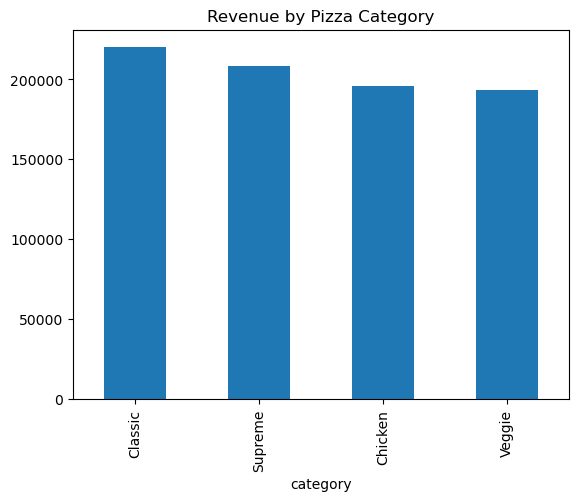

In [26]:
category_sales = df.groupby("category") ["total_price"].sum().sort_values(ascending=False)
category_sales.plot(kind="bar")
plt.title("Revenue by Pizza Category")
plt.show()

In [28]:
order_revenue = df.groupby("order_id")["total_price"].sum()
average_order_value = order_revenue.mean()
average_order_value

np.float64(38.30726229508197)

## Conclusion
- Total revenue:$817,860.05
- Total orders: 21350
- Peak Hours:12
- Bestselling pizzas:The Classic Deluxe Pizza  
- highest sales day:Friday
- seasonal trends observed in July and August had the highest sales likely holiday season. More people eating out,social gatherings or vacation traffic. In september and october may be after holiday period when people settle back into routines or school starts. Less foot traffic and possibly fewer orders. 

  Overall, the business performs strongly during specific peak hours and certain days of the week. Some pizzas underperform and may require strategic promotion or replacement.